In [1]:
'''  ______  __  ____    ____           ______   ______    __  .__   __. 
 /      ||  | \   \  /   /          /      | /  __  \  |  | |  \ |  | 
|  ,----'|  |  \   \/   /   ______ |  ,----'|  |  |  | |  | |   \|  | 
|  |     |  |   \      /   |______||  |     |  |  |  | |  | |  . `  | 
|  `----.|  |    \    /            |  `----.|  `--'  | |  | |  |\   | 
 \______||__|     \__/              \______| \______/  |__| |__| \__| 
                                                                      
.___  ___.   ______   .__   __.  __  .___________.  ______   .______      
|   \/   |  /  __  \  |  \ |  | |  | |           | /  __  \  |   _  \     
|  \  /  | |  |  |  | |   \|  | |  | `---|  |----`|  |  |  | |  |_)  |    
|  |\/|  | |  |  |  | |  . `  | |  |     |  |     |  |  |  | |      /     
|  |  |  | |  `--'  | |  |\   | |  |     |  |     |  `--'  | |  |\  \----.
|__|  |__|  \______/  |__| \__| |__|     |__|      \______/  | _| `._____|
'''




# SECTION i: PYTHON IMPORTS AND JUPYTER SETUP

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_colwidth', 1000)










#******************************************************************************#







# SECTION ii: ABSTRACT/TABLE OF CONTENTS

'''
CIV-COIN MONITOR is a python package operating as a jupyter notebook. 
It's purpose is to offer valuable insight into the functioning of testnet civcoin economies like HubCoin.
There are multiple sections. Please read through the red text before beginning your setup.

i.  Python Imports and Jupyter Setup
ii. Abstract/Table of Contents
1.  Data Import
     a) EtherScan CSVs
     b) AddressBook and Distribution Calculator
2.  Data Pre-Processing
     a) Important Accounts
     b) Universal Trims
     c) Selecting and Creating DataFrames
3.  Monthly Performance Tables
4.  Full Data Processing
'''









#******************************************************************************#








# SECTION 1: DATA IMPORT

'''
Subsection a) Etherscan CSVs

There are multiple CSVs needed. The link for all external files is shown with HubCoin as an example.
On Etherscan, csv's can be downloaded at the bottom right of the page and tab in question.
We need all transactions, click 'Download CSV Export ' on the 'Transfers' tab here and pick the date range to use:

https://goerli.etherscan.io/token/0xaaeddee8a8112ffdb798a02ca19a732e1434b6e6

From this page we also need the 'Holders' file, which gives us up to date balances for every address:

https://goerli.etherscan.io/token/0xaaeddee8a8112ffdb798a02ca19a732e1434b6e6#balances

'''
# Mine is renamed to this
All_Transactions = pd.read_csv("AllData2022-06-30.csv", thousands=',')

# And for the account balances:
Accounts=pd.read_csv('HubCoinBalances2022-07-05.csv', thousands=',')


'''
Subsection 1b): Addressbook and Distribution Calculator

That's it for Etherscan. Now we need two sheets that are kept by hand, so far:
The first is your addressbook, containing the addresses and names of all your users,
and the second is your distribution calculator, which will have the addresses of all your users,
as well as their respective contributions to discord, reddit, twitter, and the wiki.

'''
# For the first (https://docs.google.com/spreadsheets/d/14Noxpj9YKXzOg1w4v1oT5N6raMAQqGehuaDqL9FGNF8):
Address_Book=pd.read_csv('GHTD Address Book _ Distribution Worksheet - Address Book.csv', thousands=',')

# And the second, which is now two combined (https://docs.google.com/spreadsheets/d/14Noxpj9YKXzOg1w4v1oT5N6raMAQqGehuaDqL9FGNF8, tab "June Details"):
Social_Contribution_June=pd.read_csv('GHTD Address Book _ Distribution Worksheet - June Details.csv', thousands=',')
Social_Contribution_May=pd.read_csv('may_distribution_details.csv', thousands=',')
Social_Contribution = pd.concat([Social_Contribution_June, Social_Contribution_May]).groupby(['Address']).sum().reset_index()
#Social_Contribution[] = Social_Contribution_June[["Tweets","Reddit Posts/Comments","Discord Msg's","Wiki Points"]] + Social_Contribution_May[["Tweets","Reddit Posts/Comments","Discord Msg's","Wiki Points"]]
#Social_Contribution = pd.merge(Social_Contribution_June, Social_Contribution_May, how="outer")

'### *** SAVE ROOM HERE FOR MULTIPLE MONTHS ONCE APEX DELIVERS! *** ###'










# *****************************************************************************#









# SECTION 2: DATA PRE-PREPROCESSING

'''
Subsection a) Important Accounts

There are a few account addresses that you need to know. They are, in order of intended outflow:
    
    Your "Mint", the account holding the majority of your coin
    Your Treasury, which handles distribution, department budgets, taxes, and signup bonuses
    Any Multi-Send Addresses you may have *should be unecessary with final product
    Your Department Funds
    All other public funds, which may include things like your lottery or an insurance wallet

Various DataFrames are created based on the presence or exclusion of these different accounts
'''
INITIATOR = "0x0000000000000000000000000000000000000000"

MINT = "0x196bd46fe0b188d699ed882ff1e2df11dcb03067"

TREASURY = "0xfa8e908e45d7bb97f446f70953538ec062cd114b"

MULTISENDONE = "0xa5025faba6e70b84f74e9b1113e5f7f4e7f4859f"

DepartmentFunds = {
    
    "GHEC":"0x7fba3FD5BF95A5A1c4ce7B691F64D94eA89287Fd",
    
    "GHDF":"0x8391c49c43cc0941C7E1B647ed706527d5B792DA",

    "GHSL Grimr0c":"0xc6C6fbD76571155E0406510fA0bfE2b4e69B01d4",

    "GHSL Augment Echo":"0x8ABe8f92e336E6a0338C39A22522565FA653a890"

}

OtherFunds = {

    "GH Eissentam Treasury":"0xc23f61fa731822f01a96a7d792200f5bd5c86781",
    
    "GH Calypso Treasury":"0x46b5e752b5fd7463073b14f9de473be9f00b7ab8",
    
    "HubLotto":"0xf7afa6e15eef0243813376f671fa0c74f357c248"
}

PublicFunds = dict(DepartmentFunds, **OtherFunds)
# Let's make sure you typed that in correctly...
for x in PublicFunds:
    PublicFunds[x] = PublicFunds[x].lower()


'''
Subsection b) Universal Trims

We currently have four dataframes. Some of them will be the mold from which we cut new dataframes.
These child dataframes will be the basis of our inspection later on. Right now we need to frame the mold.

First, we need to add the Month&Year column to our main parent, All_Transactions, which confusingly enough
already has a column labeled 'DateTime'

'''
# Let's make sure we're working with the datetime library dtype first
All_Transactions["DateTime"] = All_Transactions["DateTime"].apply(lambda x : pd.Timestamp(x))

# Then we add the column
All_Transactions["Month"] = All_Transactions['DateTime'].dt.to_period("M")

# For bug checking: Make sure the month creation worked, sometimes it's glonky
#                           All_Transactions[All_Transactions["Month"].isnull()]
# Now we get rid of some stuff we don't need. These are both unique identifiers, but we already have a UnixTimestamp
All_Transactions.drop(['Blockno'], axis=1, inplace=True)

# We want to cut the nasty initiator transaction, that never taught us anything
All_Transactions = All_Transactions[All_Transactions["From"] != INITIATOR]

# Let's make sure there weren't any extra weird early lump transfers
All_Transactions = All_Transactions[All_Transactions["Quantity"] <1000000]

" That's it right now for All_Transactions. Let's move on to the Accounts df"

# Accounts is easy, we want to drop one column as it's never been relevant
Accounts.drop("PendingBalanceUpdate", axis=1, inplace=True)

# And then we want to change the name column to match our addressbook
Accounts["Address"] = Accounts["HolderAddress"]
Accounts.drop("HolderAddress", axis=1, inplace=True)

" Okay moving on to our gbooks "

# Addressbook only has one change, but it's very important
Address_Book['Address'] = Address_Book["Address"].str.lower()

# Social_Contribution, we want to add a Totals column
Social_Contribution["TotalContribution"] = Social_Contribution["Reddit Posts/Comments"] + Social_Contribution["Discord Msg's"] + Social_Contribution["Wiki Points"] + Social_Contribution["Tweets"]
# And do a lowercase run as well
Social_Contribution["Address"] = Social_Contribution["Address"].str.lower()

" Finally in this section, we want to add names to the three dataframes that don't have them "
" We will do this by first making a dictionary of Address:Player pairs, and then adding a new column to each DF "

# Dictionary zip-up
AddressNamePairs = dict(zip(Address_Book.Address, Address_Book.Player))

# Now we are gonna run the same for loop against each dataframe. Because of their different columns 
# I didn't make one function

# All_transactions needs two, one for "From" and one for "To"
for x in AddressNamePairs:
    for y in All_Transactions["From"]:
        if x == y:
            All_Transactions.loc[All_Transactions["From"] == x, "FromPlayer"] = AddressNamePairs[x]

for x in AddressNamePairs:
    for y in All_Transactions["To"]:
        if x == y:
            All_Transactions.loc[All_Transactions["To"] == x, "ToPlayer"] = AddressNamePairs[x]

# For Accounts DF
for x in AddressNamePairs:
    for y in Accounts["Address"]:
        if x == y:
            Accounts.loc[Accounts["Address"] == x, "Player"] = AddressNamePairs[x]

# And for Social_Contribution DF
for x in AddressNamePairs:
    for y in Social_Contribution["Address"]:
        if x == y:
            Social_Contribution.loc[Social_Contribution["Address"] == x, "Player"] = AddressNamePairs[x]

            
'''
Subsection c) Selecting and Creating Dataframes

Okay, so from here we want to create a few different versions of our dataframes

From All_Transactions, we want:
    Mint_Activity, the introduction of new currency to the economy
    Market_Activity, the activity of the market as it pertains to end user, 
                        ie. without administrative background transactions.
                        Does not include distribution or signup bonus, 
                        but does include awards and salaries.
    Private_Sector, all activity that doesn't include public funds
    
WE HAVE TO MAKE COPIES FIRST WITH THE .copy() METHOD. ANYTHING ELSE WILL MAKE CHANGES TO OUR PARENT DF
'''
# The mint is pretty straightforward
Mint_Activity = All_Transactions.copy()
Mint_Activity = Mint_Activity[Mint_Activity["From"] == MINT]

# Market_Activity is tougher, we need to cut out the distribution and department funding
Market_Activity = All_Transactions.copy()
Market_Activity = Market_Activity[(Market_Activity["From"] != MINT)
                                  | (Market_Activity["From"] != TREASURY)
                                  | (Market_Activity["From"] != MULTISENDONE)]


# And then for the private sector, we need to cut out all public funds
Private_Sector = Market_Activity.copy()
# Fortunately we made a dictionary just for this purpose

for x in PublicFunds:
    Private_Sector.drop(Private_Sector[Private_Sector["From"] == PublicFunds[x]].index, inplace=True)
    
for x in PublicFunds:
    Private_Sector.drop(Private_Sector[Private_Sector["To"] == PublicFunds[x]].index, inplace=True)
            
'''
Last little section here. Now we've gotta do a bit more magic, by combining some of these DFs into new ones.
We want to compare activity-to-date against balance, for social media activity and for hubcoin activity. That's 
a whole new frame.
The departments don't have socials, so we don't care about them. We only care about the users.
Unfortunately, not every user has sent hubcoin. 

# First up is getting everyone's transaction quantity and cumulation to date. This way we can seperate the hodlers from the spenders
# So we want to iterate through the "From" column, counting unique entries in Txhash, and then taking that
# count over to populate a new column in Accounts.
'''
# Make an object of desired groupby
gb = All_Transactions.groupby('From')

# Instantiate dictionary to hold From:Txhash.uniques
SentCount = {}
for x in gb.groups.keys():
    SentCount[x] = All_Transactions[All_Transactions["From"] == x].Txhash.nunique()
    
# Match the addresses from All_Transactions["From"] to Accounts["Address"]
for x in SentCount:
    for y in Accounts["Address"]:
        if x == y:
            # And then add the new column with the matching count data
            Accounts.loc[Accounts["Address"] == x, "SentCount"] = SentCount[x]

# Now we are gonna copy the previous block and repeat it for sum()            
gc = All_Transactions.groupby('From')
SentQuant = {}
for x in gc.groups.keys():
    SentQuant[x] = All_Transactions[All_Transactions["From"] == x].Quantity.sum()
for x in SentQuant:
    for y in Accounts["Address"]:
        if x == y:
            Accounts.loc[Accounts["Address"] == x, "Sent"] = SentQuant[x]


# Excellent! Now we have some serious data. Now we want to be able to compare Account details with social media participation
# Let's combine Social_Contribution and Accounts into a new and improved Accounts DF
Accounts = pd.merge(Accounts, Social_Contribution,how="outer")

<AxesSubplot:xlabel='Player'>

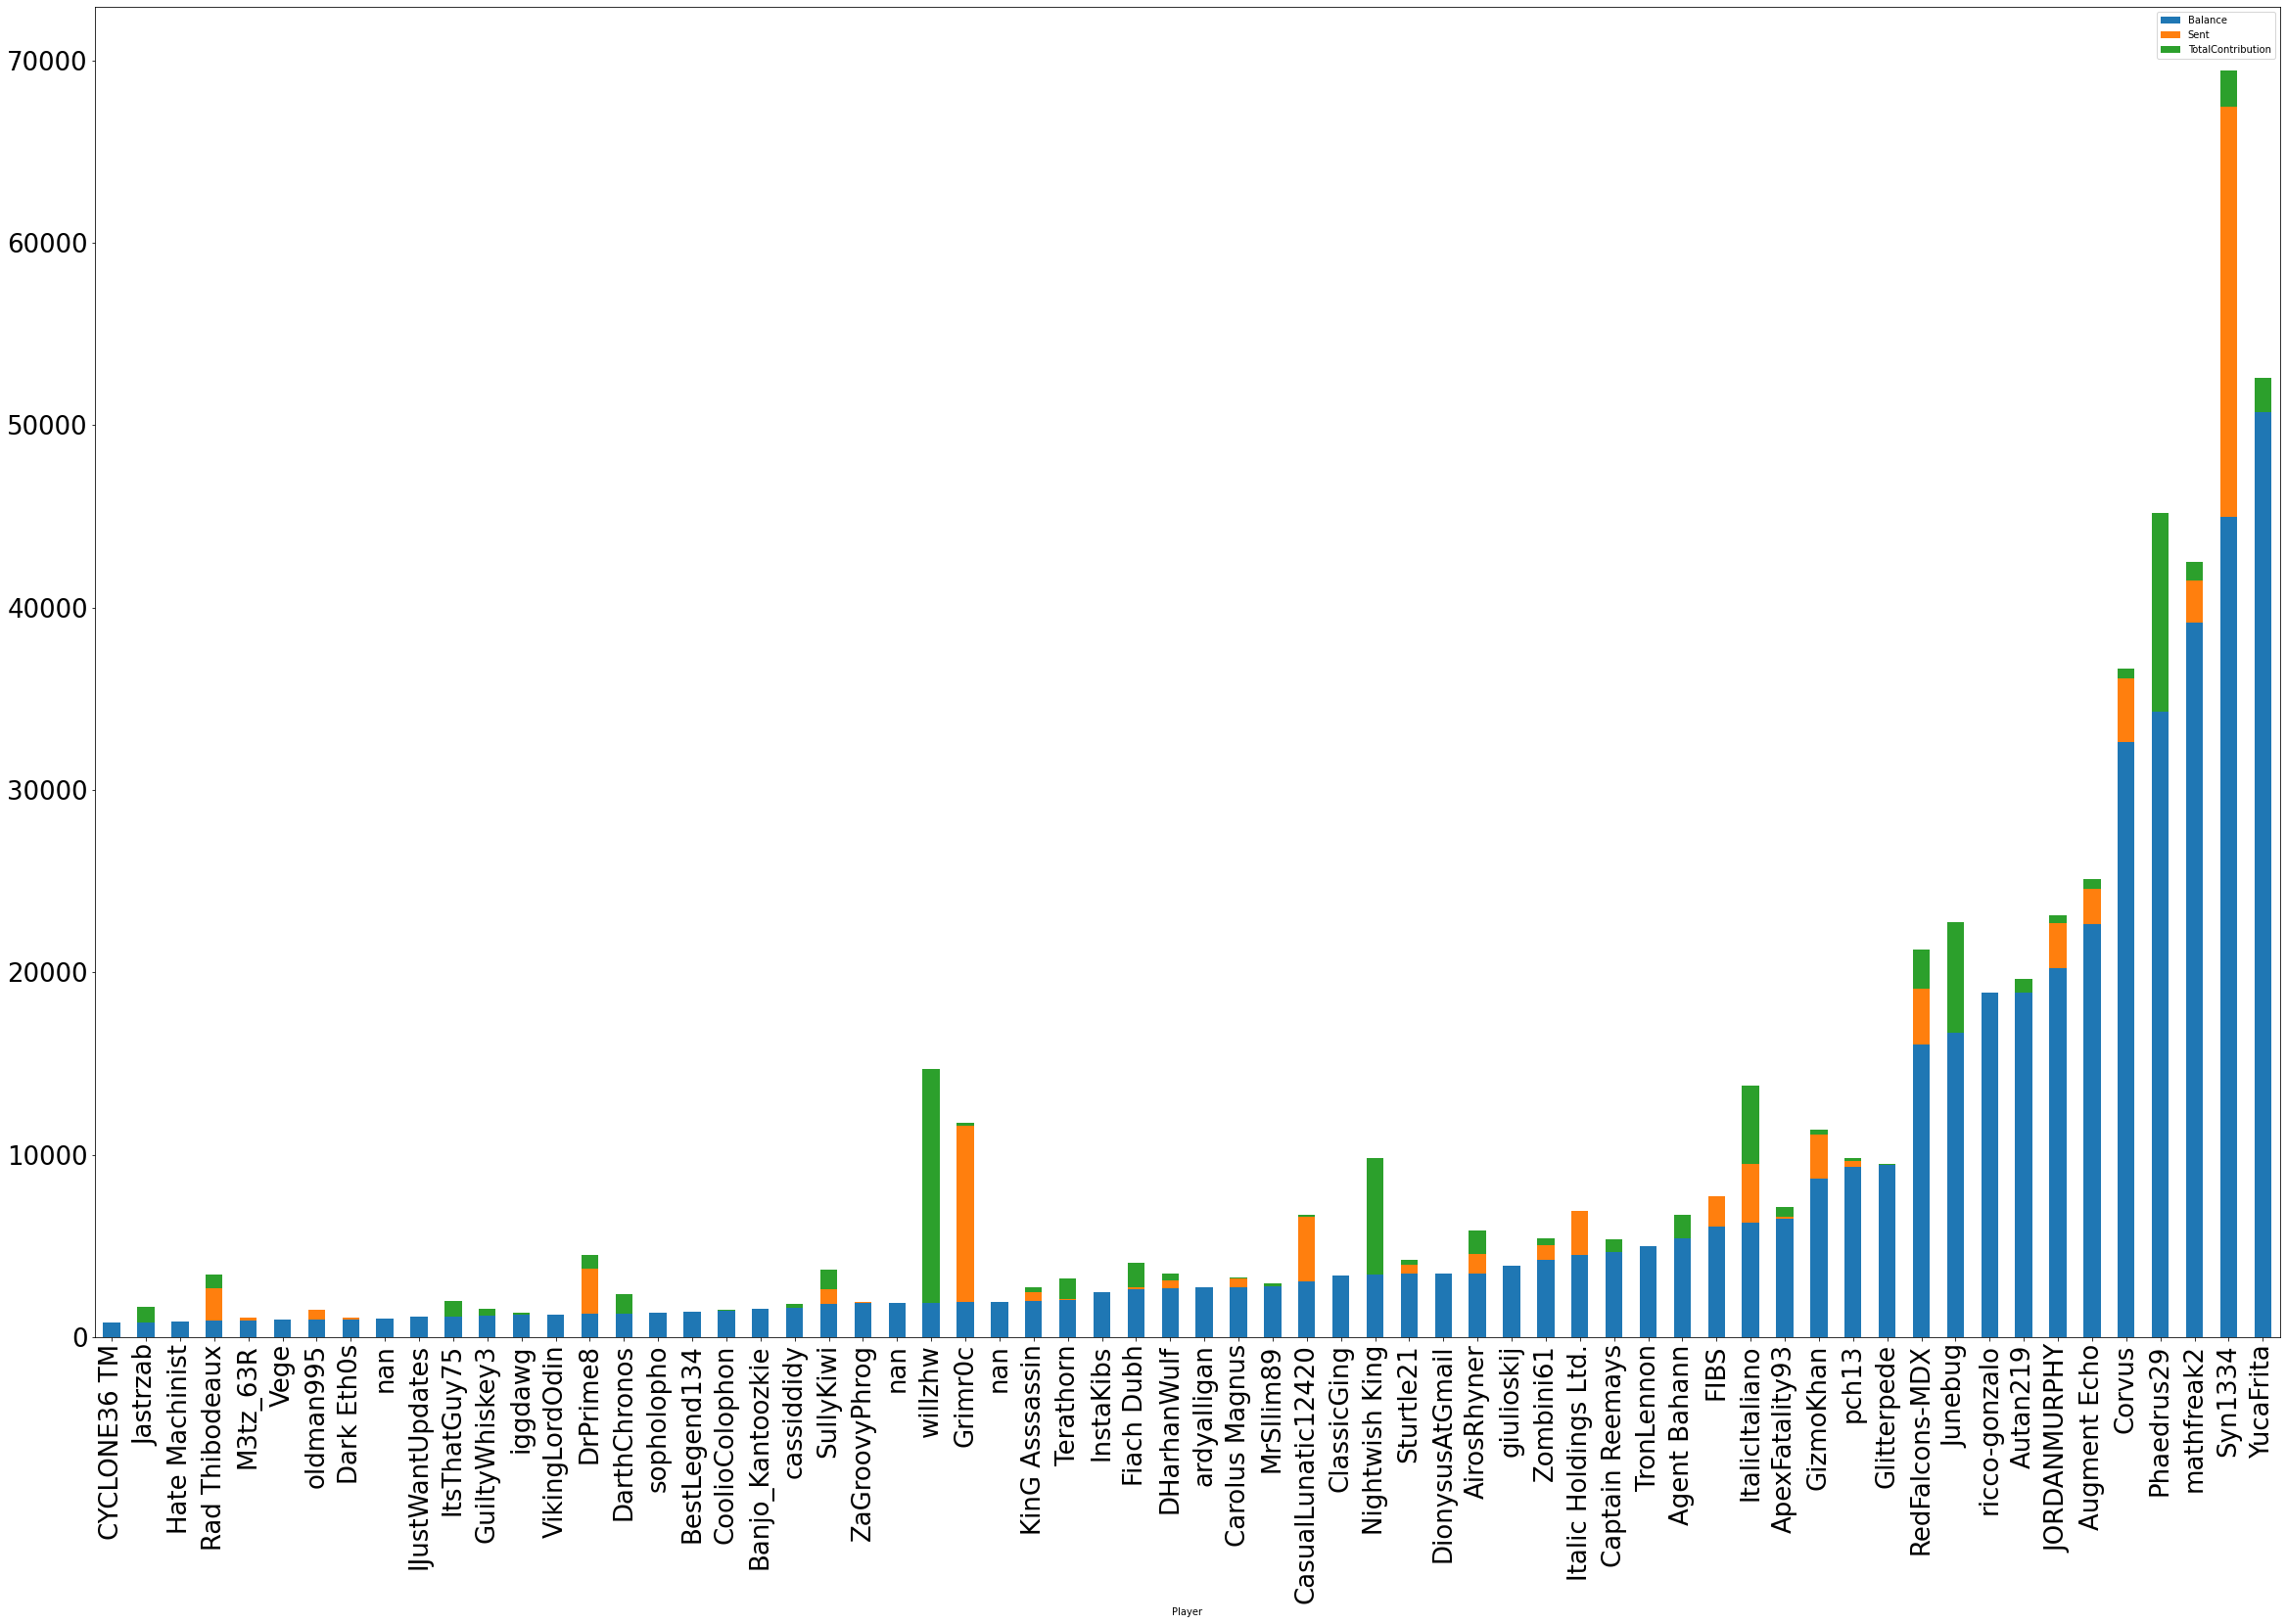

In [2]:
AFPS = Accounts.copy()
for x in PublicFunds:
    AFPS.drop(AFPS[AFPS["Address"] == PublicFunds[x]].index, inplace=True)
AFPS.sort_values(by="Balance")
AFCut = AFPS[["Player","Balance","Sent","TotalContribution"]]
AFCut = AFCut[AFCut["Balance"]>800]
AFCut = AFCut[AFCut["Balance"]<100000]
AFCut = AFCut.sort_values(by = "Balance")
AFCut.plot.bar(x="Player",stacked=True,figsize=(40,25),fontsize=26)


In [3]:
All_Transactions[All_Transactions["FromPlayer"]=="GHEC Discretionary Fund"].groupby("Month").sum()

,UnixTimestamp,Quantity
Month,,
2021-11,42563117982,22850.0
2021-12,34421248330,11000.0
2022-01,14776518509,31200.0
2022-04,1648941175,2000.0
2022-05,8267065508,2250.0


In [4]:
All_Transactions[(All_Transactions["FromPlayer"]=="GHSL Discretionary Fund - Grimr0c") | (All_Transactions["FromPlayer"]=="GHSL Discretionary Fund - Augment Echo")].groupby("Month").sum()

,UnixTimestamp,Quantity
Month,,
2022-01,3284812582,1600.0
2022-02,6580393324,1675.0
2022-03,14828961060,1695.0
2022-04,13198172947,3360.0
2022-05,19826976400,3671.0
2022-06,3311057326,625.0
